In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data_path = '/home/data/mydata/data.npy'
label_path = '/home/data/mydata/labels.npy'

data = np.load(data_path)
labels = np.load(label_path)

In [13]:
# kick out last two days
data = data[:, :-2, :]
data.shape

(66760, 19, 2)

### Statistics of Train dataset
The point here is to check mean and standard deviation of dataset when computed e.g. across all samples (timesteps & features) or across one sample (timesteps & features)
#### Across all samples, timesteps, channels

##### With zeros

In [14]:
data.ravel().mean(), np.median(data.ravel()), data.ravel().std()

(-13.869112, -14.142743, 5.8981166)

##### Without zeros

In [15]:
# exclude zeros
zero_mask = data.ravel() != 0
zero_mask.shape

(2536880,)

In [16]:
data.ravel()[zero_mask].mean(), np.median(data.ravel()[zero_mask]), data.ravel()[zero_mask].std()

(-13.869112, -14.142743, 5.8981166)

##### Without zeros (method 2)

In [17]:
# create mask for time series that have only zeros (bad data)
zero_mask = np.all(data!=0, axis=1)
zero_mask = np.expand_dims(zero_mask, axis=1)
zero_mask.shape

(66760, 1, 2)

In [18]:
zero_mask = [zero_mask for i in range(data.shape[1])]
zero_mask = np.concatenate(tuple(zero_mask), axis=1)
zero_mask.shape

(66760, 19, 2)

In [19]:
data[zero_mask].mean(), np.median(data[zero_mask]), data[zero_mask].std()

(-13.869112, -14.142743, 5.8981166)

#### Per-sample across timesteps and channels

##### With zeros

In [8]:
sample_mean = data.mean(axis=(1, 2))
sample_median = np.median(data, axis=(1, 2))
sample_std = data.std(axis=(1, 2))

(-13.869108, -14.493886, 4.5364313)

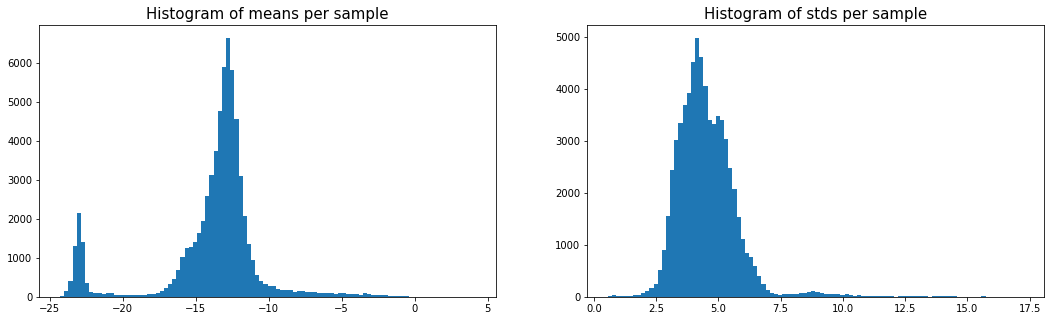

In [9]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=2, nrows=1);
ax[0].hist(sample_mean, bins=100);
ax[0].set_title(label='Histogram of means per sample', fontsize=15)

ax[1].hist(sample_std, bins=100);
ax[1].set_title('Histogram of stds per sample', fontsize=15)

sample_mean.mean(), sample_median.mean(), sample_std.mean()

##### Without zeros

In [10]:
mean_zero_mask = data.mean(axis=(1, 2)) != 0
std_zero_mask = data.std(axis=(1, 2)) != 0

In [11]:
sample_mean = data.mean(axis=(1, 2))[mean_zero_mask]
sample_median = np.median(data, axis=(1, 2))
sample_std = data.std(axis=(1, 2))[std_zero_mask]

(-13.869108, -14.493886, 4.5364313)

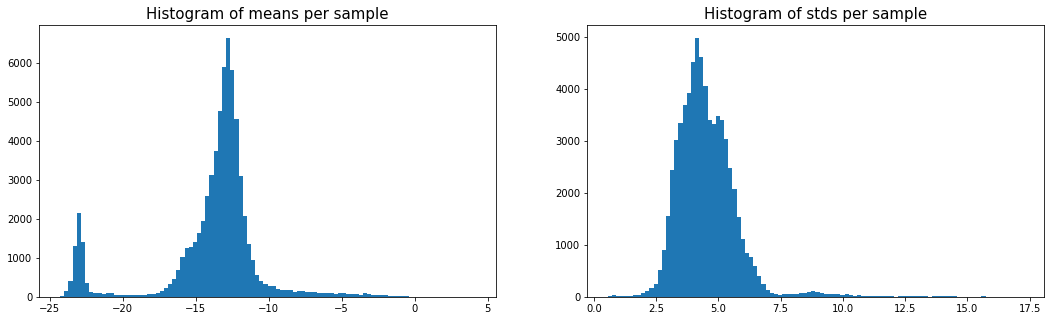

In [12]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=2, nrows=1);
ax[0].hist(sample_mean, bins=100);
ax[0].set_title(label='Histogram of means per sample', fontsize=15)

ax[1].hist(sample_std, bins=100);
ax[1].set_title('Histogram of stds per sample', fontsize=15)

sample_mean.mean(), sample_median.mean(), sample_std.mean()

In [34]:
data[labels==1, :, 0].T.shape

(21, 32707)

In [45]:
def get_mean_confidence(data, conf_upper, conf_lower):
    """
    Args:
        data (numpy.array): dimensions should be (time, length)
    
    Returns:
        mean, upper, lower (tuple): returns a tuple of numpy.array objects
    """
    return np.median(data, axis=1), np.mean(data, axis=1), np.percentile(data, conf_upper, axis=1), np.percentile(data, conf_lower, axis=1)

In [58]:
vv_median, vv_mean, vv_upper, vv_lower = get_mean_confidence(data[labels==1, :, 1].T, 100, 0)
# vh_mean, vh_upper, vh_lower = get_mean_confidence(data[labels==1,...], 95, 5)

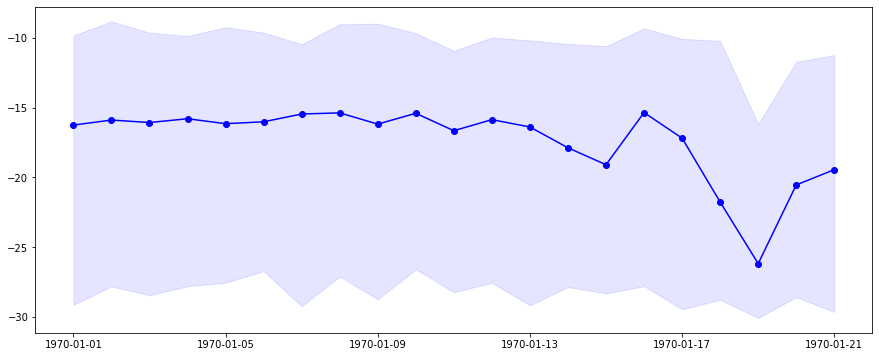

In [59]:
# plot time series
fig, ax = plt.subplots(figsize=(15, 6))

# flood
p1 = ax.plot_date(np.arange(21), vv_median, '-bo'); # plot mean
p2 = ax.fill_between(np.arange(21), vv_upper, vv_lower, alpha=0.1, color='b'); # plot confidence intervals
# no flood
# ax.plot_date(eop_image.timestamp[:-2], vh_mean, '-ro', xdate=True, ydate=False);
# ax.fill_between(eop_image.timestamp[:-2], vh_upper, vh_lower, alpha=0.1, color='r');

# ax.legend(['Flood average', 'No Flood average', 'Flood std', 'No Flood std'], loc='upper left')
# ax.tick_params('x', rotation=45)
# ax.set_ylabel(r'VV $\sigma_0$ [dB]', fontsize=15)
# ax.set_title('Time Series of annotated data', fontsize=23)
# ax.grid();
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

In [32]:
vv_mean.shape

(32707,)